# MAKİNE ÖĞRENMESİ UYGULAMALARIYLA KALP KRİZİ TAHMİN PROJESİ

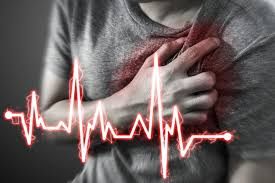

# GENEL HUSUSLAR

---
**1. Proje Konusu       :** Makine Öğrenmesi Uygulamalarıyla Kalp Krizi Tahmini

**2. Projenin Kapsamı   :** Python ile Veri Analizi ve Makine Öğrenmesi

**3. Projeyi Hazırlayan :** Ahmet SANCAKLI

**4. Projede Kullanılan Veri Seti:**

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=o2Saturation.csv

**5. Proje Özeti :**

Proje; veri analizi ve makine öğrenmesi uygulamaları ile olası bir kalp krizi rahatsızlığının önceden tahminini yapabilmek amacıyla tasarlanmıştır. 

Proje kapsamında www.kaggle.com sitesinden, kalp krizinin ön belirtilerini içerebilecek veri seti (303 satır x 14 sütun büyüklüğünde) tespit edilmiş ve çalışma bu veri seti üzerine inşa edilmiştir. Tespit edilen veri seti hem kategorik hem de numerik(Kantitatif,Nicel) verileri içermektedir.

Projede python yazılım programı ile ilgili kütüphaneler kullanılmıştır. Bunun yanında temel istatistik bilgileri kullanılarak analizler yapılmıştır.

Model seçimi kapsamında yapılan analizler sonucunda Destek Vektör Makinesi algoritması(SVC) kullanılmış ve neticede örneklem üzerinden % 81.79 doğrulukla kalp krizinin önceden tahmin edilebilmesi sağlanmıştır.

**6. Kullanılan Açık Kütüphaneler :**
1. Pandas
2. Numpy
3. Matplotlib
4. Sklearn
5. Seaborn
6. Pickle
7. Dlib
---
**7. Kaynakça:**
1. Vektörel Bilişim Ders Notları
2. "Pima Indians Diabetes" örnek modeli. 

# 1. VERİ HAZIRLAMA VE VERİ ÖN İŞLEME

**1.1 Dosyanın Colab'a Yüklenmesi**

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving heart.csv to heart.csv
User uploaded file "heart.csv" with length 11323 bytes


**1.2 İlgili Kütüphanelerin Yüklenmesi**

In [ ]:
import os
import pandas as pd
import numpy as np

**1.3 Veri Setinin Yüklenmesi**

In [ ]:
dataset = pd.read_csv(r"/content/heart.csv")

**1.4 Veri Setinin Boyutları**

In [ ]:
dataset.shape

(303, 14)

**1.5 Veri Setinin Genel Görünümü**

In [ ]:
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


---
**Sütün Açıklaması**

**Age** : Age of the patient

**Sex** : Sex of the patient

**cp** : Chest Pain type

Value 1: typical angina Value 2: atypical angina Value 3: non-anginal pain Value 4: asymptomatic

**trtbps** : resting blood pressure (in mm Hg)

**chol** : cholestoral in mg/dl fetched via BMI sensor

**fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**restecg** : resting electrocardiographic results

Value 0: normal Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalachh** : maximum heart rate achieved

**exang**: exercise induced angina (1 = yes; 0 = no)

**oldpeak** : Previous peak

**slp** : Slope

**caa** : Number of major vessels

**thall** : Thalium Stress Test result (0,3)

**output :** 0 = less chance of heart attack, 1 = more chance of heart attack
---

**1.6 Boş Veri Durumu**

In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**1.7 Veri Setindeki Sütün İsimlerin Değiştirilmesi**

In [ ]:
dataset.columns = ["Age","Gender","ChestPainTp","RestbloodPr","Chol","Fa_bloodSu","rest_ecg","MaxHeartRate","Ex_In_An","oldpeak","slope","NumMajVest","ThallTest","output"]


**1.8 Tekrar Eden Verilerin Tespiti Ve Kaldırılması**

In [ ]:
dataset[dataset.duplicated()]

,Age,Gender,ChestPainTp,RestbloodPr,Chol,Fa_bloodSu,rest_ecg,MaxHeartRate,Ex_In_An,oldpeak,slope,NumMajVest,ThallTest,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
dataset.drop_duplicates(keep='first',inplace=True)

**1.9 Veri Setinin Yeni Görünümü**

In [ ]:
dataset

,Age,Gender,ChestPainTp,RestbloodPr,Chol,Fa_bloodSu,rest_ecg,MaxHeartRate,Ex_In_An,oldpeak,slope,NumMajVest,ThallTest,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**1.10 Sütünlar Hakkında Genel Bilgiler**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           302 non-null    int64  
 1   Gender        302 non-null    int64  
 2   ChestPainTp   302 non-null    int64  
 3   RestbloodPr   302 non-null    int64  
 4   Chol          302 non-null    int64  
 5   Fa_bloodSu    302 non-null    int64  
 6   rest_ecg      302 non-null    int64  
 7   MaxHeartRate  302 non-null    int64  
 8   Ex_In_An      302 non-null    int64  
 9   oldpeak       302 non-null    float64
 10  slope         302 non-null    int64  
 11  NumMajVest    302 non-null    int64  
 12  ThallTest     302 non-null    int64  
 13  output        302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


# 2. ÖZELLİK SEÇİMİ

**2.1 Veri Setinin İstatistiksel Görünümü**

In [ ]:
dataset.describe()

,Age,Gender,ChestPainTp,RestbloodPr,Chol,Fa_bloodSu,rest_ecg,MaxHeartRate,Ex_In_An,oldpeak,slope,NumMajVest,ThallTest,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Tespitler_1:** 
1. Chol sütununda verilerin aykırı şekilde dağılımı söz konusudur.
2. Fa_bloodSu veri de özel olarak incelenmelidir. 
3. oldpeak verisinde düzensiz bir dağılım görülmektedir.

**2.2 Veri Setinin Korelasyon Durumu**

In [ ]:
corr = dataset.corr()
corr

,Age,Gender,ChestPainTp,RestbloodPr,Chol,Fa_bloodSu,rest_ecg,MaxHeartRate,Ex_In_An,oldpeak,slope,NumMajVest,ThallTest,output
Age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
Gender,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
ChestPainTp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
RestbloodPr,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
Chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
Fa_bloodSu,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
rest_ecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
MaxHeartRate,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
Ex_In_An,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


**2.3 Veri Setinin Görselleştirilmesi**

**2.3.1 Heat Map/Seaborn İle Mukayeseli İlişki Matrisi**

<AxesSubplot:>

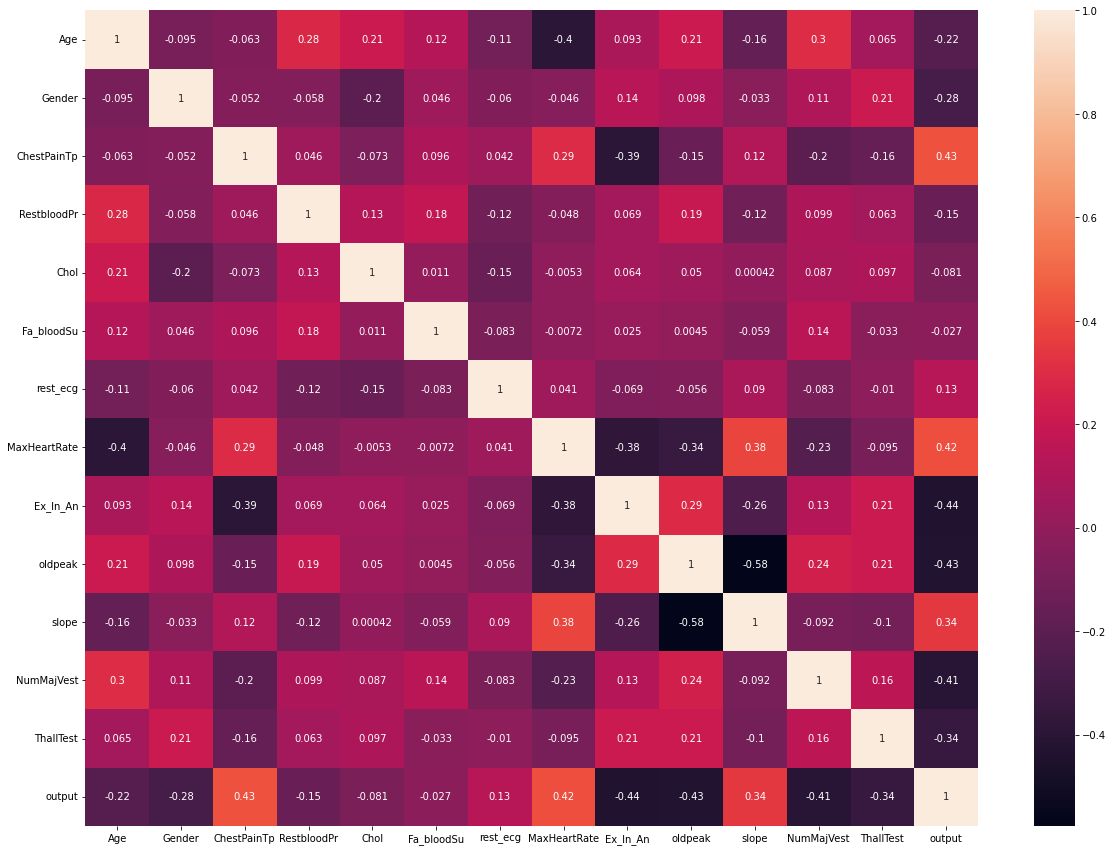

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)


**TESPİTLER_2:**
1. Age, verisinin kalp rahatsızlığıyla ters ilişkili olduğu görülmektedir. Böyle bir sonucun çıkması muhtemelen örneklem kümesinin az olması ve bu küme içerisinde nispeten genç yaştaki kalp rahatsızlığı olanların fazlalığından kaynaklanmaktadır.
2. Erkeklerdeki kalp krizi kadınlara göre oldukça fazla olduğu tespit edilmiştir.
3. Chol verisinin kalp krizi ile doğrudan ilişkisinin düşük olduğu (-0,081) ancak kalp krizi ile doğrudan ilişkisi olan yaş (0,21) ve cinsiyet(-0,2) ile ilişkili olduğu, dolayısıyla değerlendirmeye alınması uygun görülmektedir. 
4. Fa_bloodSu verisi kalp krizi ile doğrudan veya dolaylı ilişkisinin çok düşük olduğundan dikkate alınmamasına karar verilmiştir.



**2.3.2 Histogram Grafikleri**

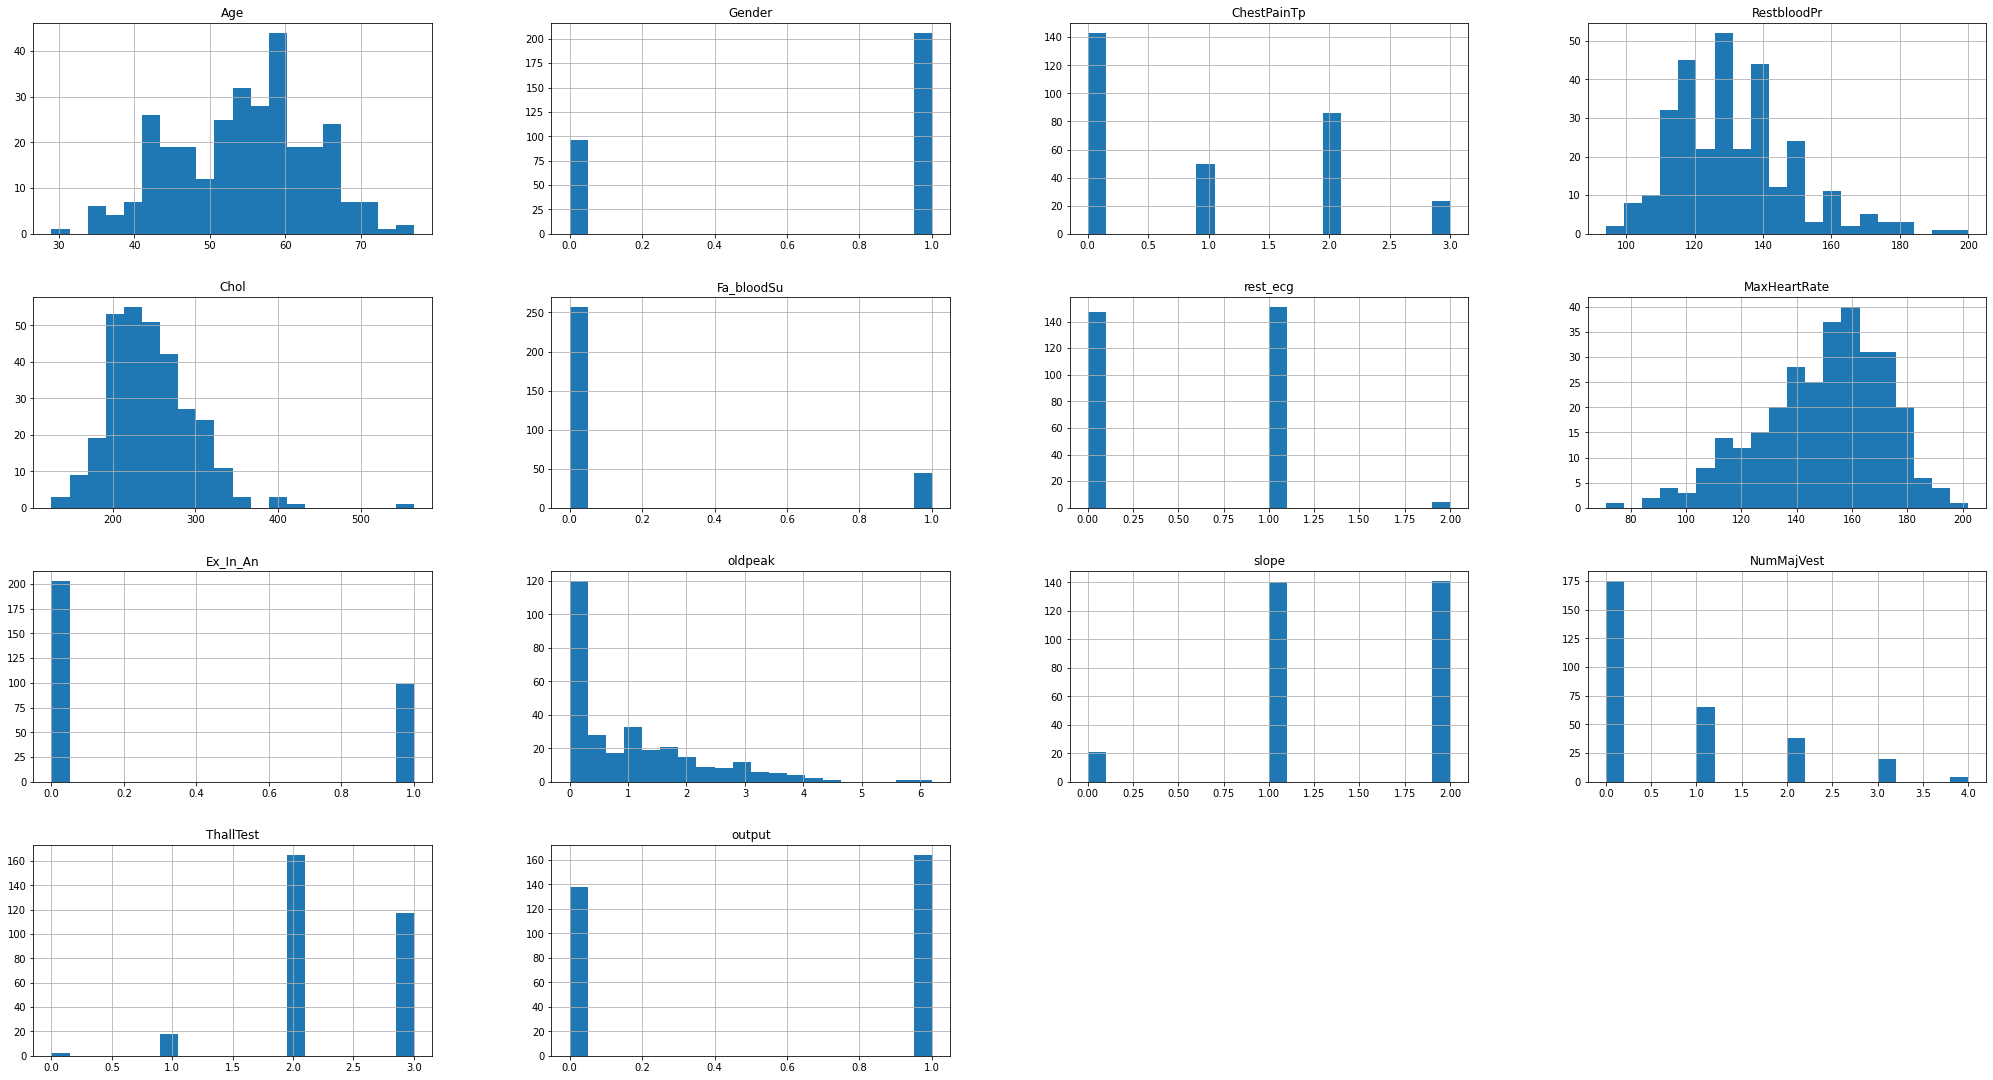

In [ ]:
dataset.hist(bins=20, figsize=(35, 19))
plt.show()

**TESPİTLER_3:** 
1. Age grafiğinde 30 altı değerleri,
2. RestbloodPr grafiğinde 180 ve üzeri değeri,
3. Chol grafiğinde 370 ve üzeri değerleri, 
4. MaxHeartRate grafiğinde 80 ve 200 değeri,
5. Oldpeak grafiğinde 6 değeri ayrık veri olarak kabul edilmiş, ayrık veriler ortalama veri esas alınarak diğer verilerin üzerine dağıtılacaktır.
6. Fa_bloodSu verisi heatmap'teki tespitten dolayı silinecektir.

**2.3.3 Ayrık Verilerin Düzenlenmesi ve Özellik Seçimi**

In [ ]:
mean_Age = dataset["Age"].mean()
dataset['Age'] = dataset['Age'].mask(dataset['Age'] < 30, mean_Age)

<AxesSubplot:>

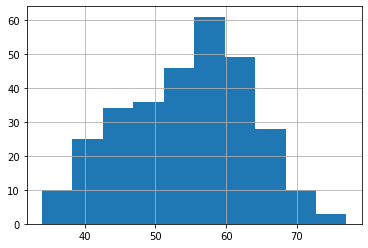

In [ ]:
dataset["Age"].hist()

In [ ]:
mean_RestbloodPr = dataset["RestbloodPr"].mean()
dataset['RestbloodPr'] = dataset['RestbloodPr'].mask(dataset['RestbloodPr'] > 180, mean_RestbloodPr)

<AxesSubplot:>

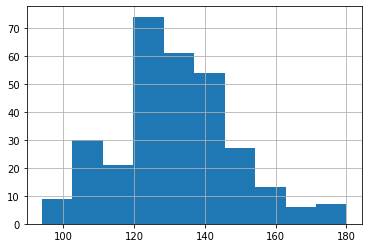

In [ ]:
dataset["RestbloodPr"].hist()

In [ ]:
mean_Chol = dataset["Chol"].mean()
dataset['Chol'] = dataset['Chol'].mask(dataset['Chol'] >= 370, mean_Chol)

<AxesSubplot:>

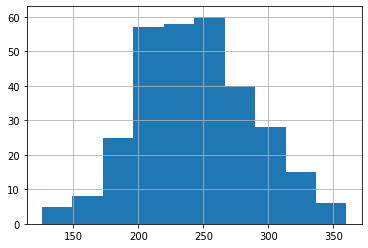

In [ ]:
dataset["Chol"].hist()

In [ ]:
mean_MaxHeartRate = dataset["MaxHeartRate"].mean()
dataset['MaxHeartRate'] = dataset['MaxHeartRate'].mask(dataset['MaxHeartRate'] < 90, mean_MaxHeartRate)

<AxesSubplot:>

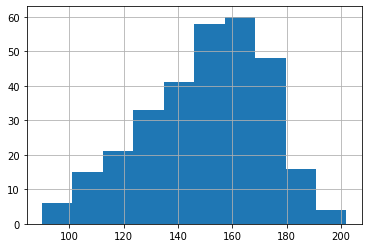

In [ ]:
dataset["MaxHeartRate"].hist()

In [ ]:
mean_oldpeak = dataset["oldpeak"].mean()
dataset['oldpeak'] = dataset['oldpeak'].mask(dataset['oldpeak'] >= 5, mean_oldpeak)

<AxesSubplot:>

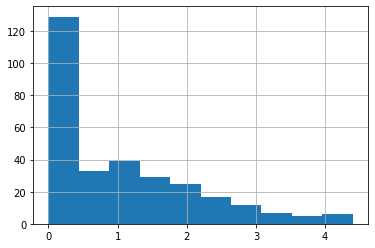

In [ ]:
dataset["oldpeak"].hist()

In [ ]:
dataset = dataset.drop(["Fa_bloodSu"],axis=1)


**2.3.4 Seçilen Özelliklerin Son Görünümü**

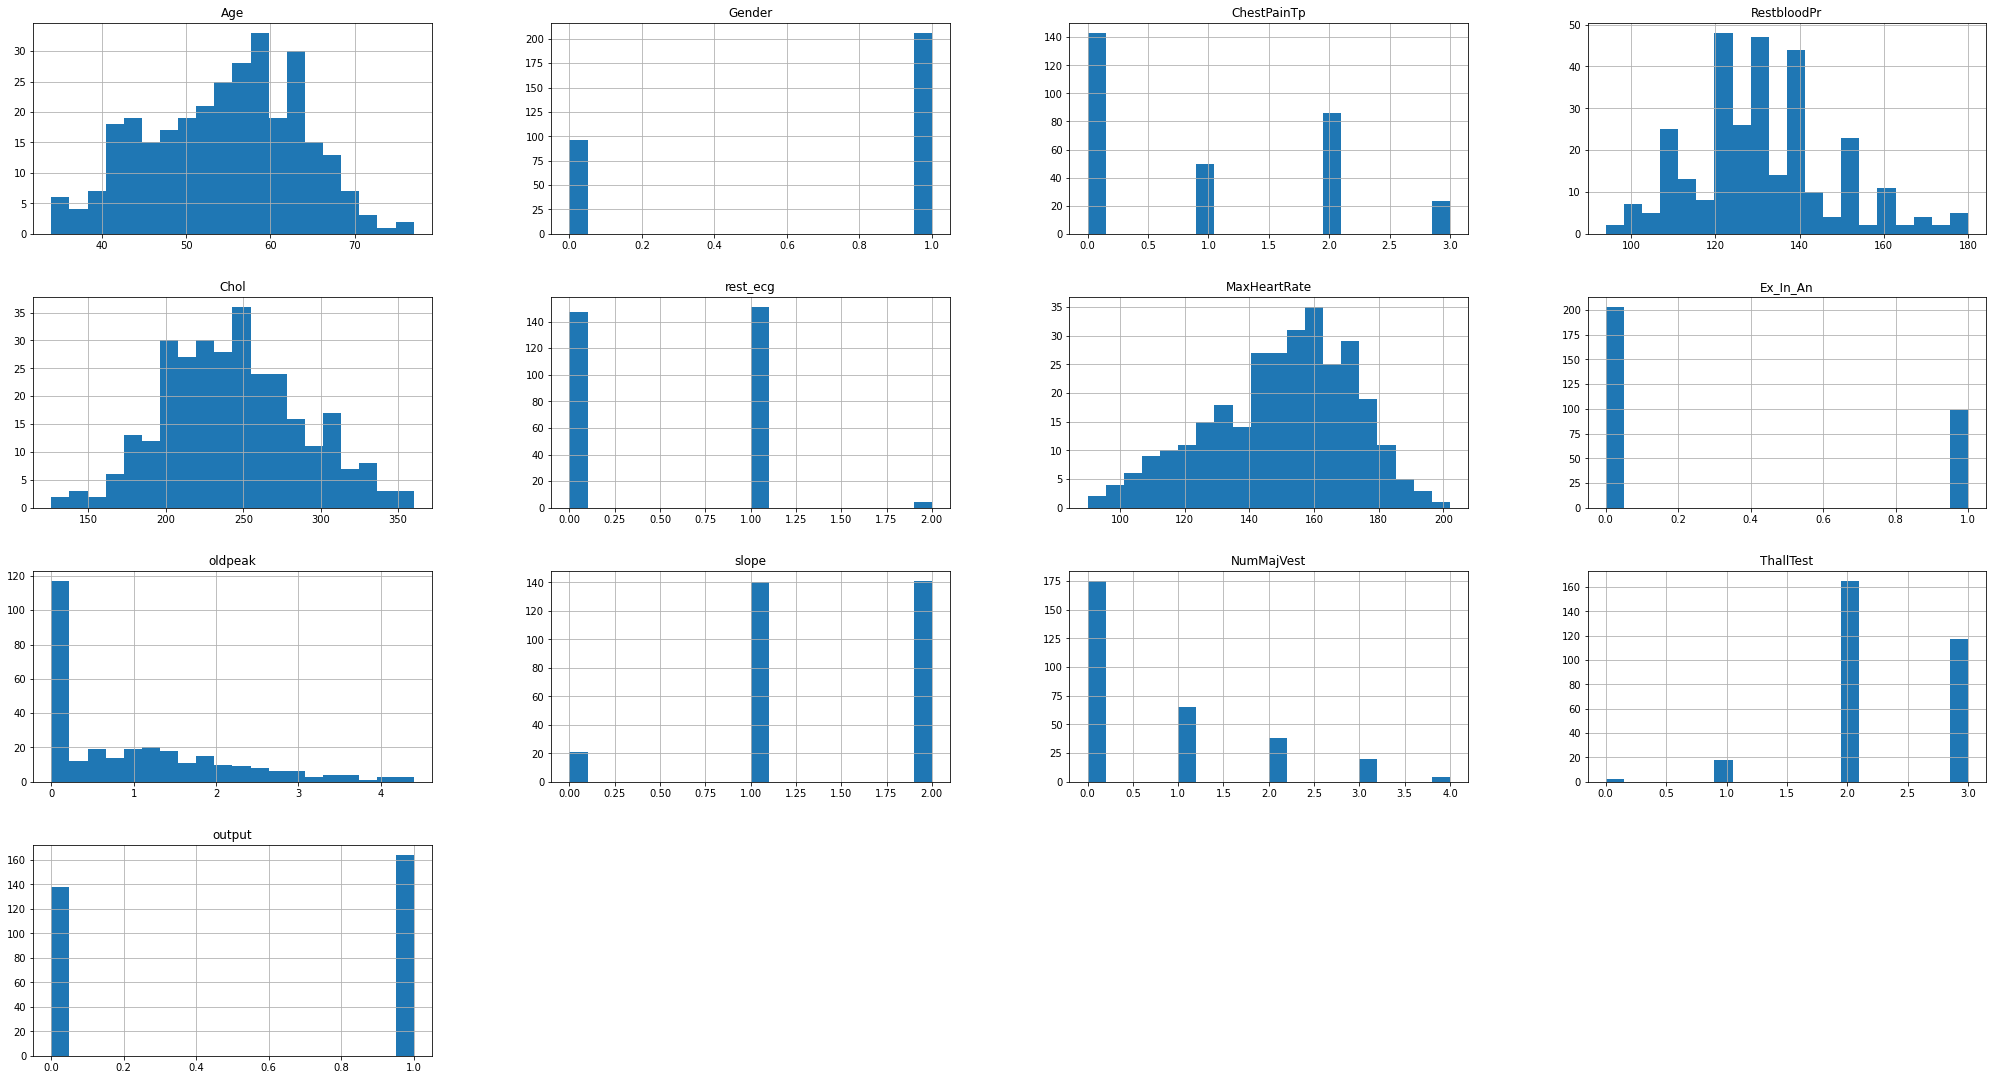

In [ ]:
dataset.hist(bins=20, figsize=(35, 19))
plt.show()

In [ ]:
corr = dataset.corr()
corr

,Age,Gender,ChestPainTp,RestbloodPr,Chol,rest_ecg,MaxHeartRate,Ex_In_An,oldpeak,slope,NumMajVest,ThallTest,output
Age,1.000000,-0.089790,-0.063620,0.298318,0.163921,-0.122555,-0.372462,0.087872,0.199266,-0.157077,0.299567,0.061340,-0.215786
Gender,-0.089790,1.000000,-0.051740,-0.048765,-0.122459,-0.060351,-0.033672,0.143460,0.118164,-0.032990,0.113060,0.211452,-0.283609
ChestPainTp,-0.063620,-0.051740,1.000000,0.060980,-0.088076,0.041561,0.283540,-0.392937,-0.128530,0.116854,-0.195356,-0.160370,0.432080
RestbloodPr,0.298318,-0.048765,0.060980,1.000000,0.124783,-0.095389,-0.062824,0.060805,0.157538,-0.109781,0.083441,0.037355,-0.125555
Chol,0.163921,-0.122459,-0.088076,0.124783,1.000000,-0.099762,-0.023373,0.098363,0.045228,0.025897,0.079441,0.071110,-0.111607
rest_ecg,-0.122555,-0.060351,0.041561,-0.095389,-0.099762,1.000000,0.061493,-0.068807,-0.056649,0.090402,-0.083112,-0.010473,0.134874
MaxHeartRate,-0.372462,-0.033672,0.283540,-0.062824,-0.023373,0.061493,1.000000,-0.385018,-0.347537,0.384044,-0.241752,-0.093800,0.411102
Ex_In_An,0.087872,0.143460,-0.392937,0.060805,0.098363,-0.068807,-0.385018,1.000000,0.296357,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.199266,0.118164,-0.128530,0.157538,0.045228,-0.056649,-0.347537,0.296357,1.000000,-0.546388,0.226124,0.189494,-0.424610
slope,-0.157077,-0.032990,0.116854,-0.109781,0.025897,0.090402,0.384044,-0.256106,-0.546388,1.000000,-0.092236,-0.103314,0.343940


<AxesSubplot:>

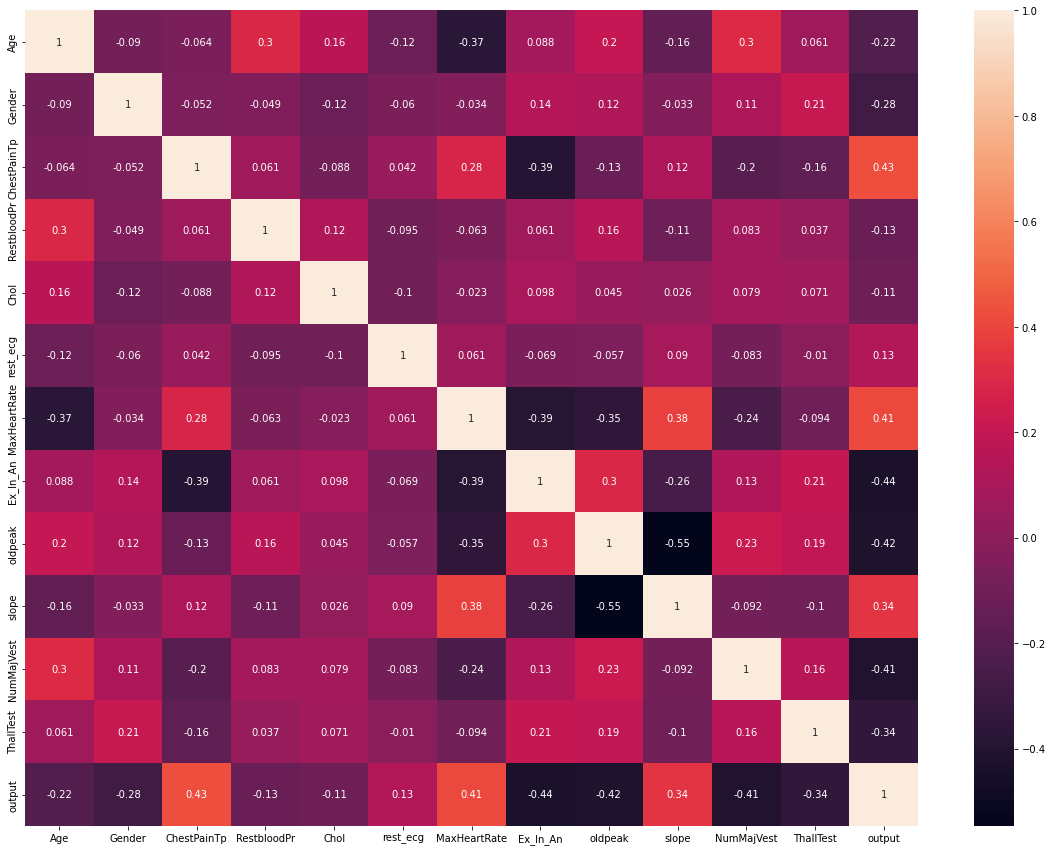

In [ ]:
%matplotlib inline
import seaborn as sns
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

# 3. MODEL SEÇİMİ

**3.1 Eğitim ve Test Verisinin Ayırılması(%80, %20)**





In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    dataset, test_size=0.2, random_state=42)

**3.2 Etiket Verisinin Diğer Veriden Ayrılması**

In [ ]:
train_set_labels = train_set["output"].copy()
train_set = train_set.drop("output", axis=1)

test_set_labels = test_set["output"].copy()
test_set = test_set.drop("output", axis=1)

**3.3 Standart Ölçeklendirme Yapılması**

In [ ]:
from sklearn.preprocessing import StandardScaler as Scaler

scaler = Scaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

In [ ]:
dataset = pd.DataFrame(data=train_set_scaled)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.384460,0.731459,0.000000,-0.637404,1.161044,0.890028,0.546464,-0.659184,-0.939790,0.965436,-0.683490,-0.545762
1,1.500081,0.731459,0.966493,2.954225,0.691861,-0.991522,0.000647,1.517027,0.633831,-0.684707,-0.683490,1.140502
2,1.389137,0.731459,-0.966493,-0.338101,0.245021,0.890028,0.591949,-0.659184,-0.743088,-0.684707,1.350103,1.140502
3,0.057810,-1.367131,0.000000,0.260504,0.155653,-0.991522,0.500980,-0.659184,0.437129,-0.684707,-0.683490,-0.545762
4,1.056305,0.731459,0.966493,0.559806,2.054726,0.890028,0.364525,-0.659184,-0.939790,0.965436,-0.683490,-0.545762


**3.4 Test Etmek İstediğimiz Algoritmaların Yüklenemsi**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

**3.5 Algoritmaların Karşılaştırılması İçin Slearn Yüklenmesi**

In [ ]:
from sklearn import model_selection

**3.6 Algoritmaları İçeren Dizinin Hazırlanması**

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeRegressor()))

**3.7 Test İçin İlgili Konfigurasyonun Hazırlanması**

In [ ]:
seed = 7
results = []
names = []
X = train_set_scaled
Y = train_set_labels

**3.8 Testin Başlatılması ve Sonuçlarının Görülmesi**

In [ ]:
# Every algorithm is tested and results are
# collected and printed
for name, model in models:
    kfold = model_selection.KFold(shuffle=True,
        n_splits=20, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (
        name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.813542 (0.122410)
KNN: 0.817500 (0.110739)
NB: 0.810417 (0.099752)
SVC: 0.830417 (0.104459)
LSVC: 0.820417 (0.111942)
RFC: 0.827500 (0.097623)
DTR: 0.757917 (0.097867)


**3.9 Boxplot Grafiği İle Algoritmaların Karşılaştırılması**

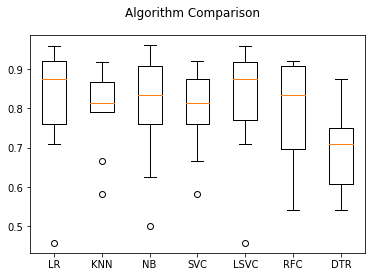

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax= fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show() 

**Bulgular:**
En uygun algoritma olarak SVC seçilmiştir.

**3.10 Model Seçimi ve Uygulanması**

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

param_grid = {
    'C': [1.0, 10.0, 50.0],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'shrinking': [True, False],
    'gamma': ['auto', 1, 0.1],
    'coef0': [0.0, 0.1, 0.5]
}

model_svc = SVC()

grid_search = RandomizedSearchCV(
    model_svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_set_scaled, train_set_labels)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1.0, 10.0, 50.0],
                                        'coef0': [0.0, 0.1, 0.5],
                                        'gamma': ['auto', 1, 0.1],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid'],
                                        'shrinking': [True, False]},
                   scoring='accuracy')

**3.11 Ulaşılan En Yüksek Değer:**

In [ ]:
grid_search.best_score_

0.8382653061224488

In [ ]:
svc = grid_search.best_estimator_

In [ ]:
predictions =  svc.predict(test_set_scaled)

# 4. DEĞERLENDİRME

**4.1 Confusion Matrix ile Değerlendirme**

<AxesSubplot:>

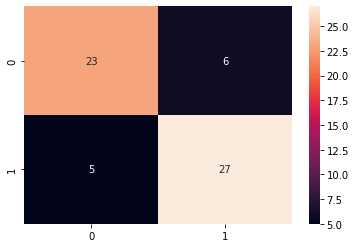

In [ ]:
from sklearn import metrics
confMatrix = metrics.confusion_matrix(test_set_labels,predictions)
import seaborn as sns
sns.heatmap(confMatrix,annot=True)

**Bulgular:**
Yapılan değerlendirmede 50 örnek kümesi üzerinden 11 hatalı değer tespit edilmiştir.

**4.2 En İyi Sonuç Veren Parametre İle Obje Oluşturma / Bütün Veri Tabanını Eğitme / Modeli Eğitme**

In [ ]:
svc = grid_search.best_estimator_


X = np.append(train_set_scaled, test_set_scaled, axis=0)
Y = np.append(train_set_labels, test_set_labels, axis=0)


svc.fit(X, Y)

SVC(C=50.0, gamma=1, kernel='linear')

**4.3 Yeni Veriler Girilerek Sistemin Test Edilmesi**

In [ ]:
new_df = pd.DataFrame([[55,1,1,130,210,0,1,155,0,1.5,1,2]])
new_df_scaled = scaler.transform(new_df)#Ölçeklendirme Yapılmıştır.

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**4.4 Sonucun Tahmin Edilmesi**

In [ ]:
prediction = svc.predict(new_df_scaled)

In [ ]:
prediction

array([0])

**4.5 Modelin Kaydedilmesi**

In [ ]:
import pickle
import dlib

In [ ]:
pickle.dump(svc,open("/content/mlmodel1.pkl","wb"))
pickle.dump(scaler,open("/content/olcek.pkl","wb"))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
